# Import Basic Libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## Importing dataset

In [30]:

df= pd.read_csv(r'G:\Rhishi\AirPassengers.csv').fillna(0)
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


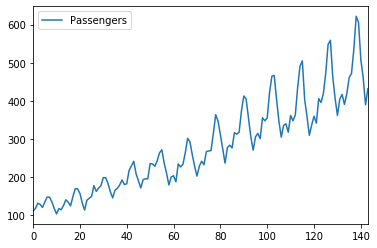

In [31]:
df.plot()

As in above graph , we can see that our time series having increasing trend i.e our time series is not stationary

# ADF Test for checking stationarity of the series
The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then you reject the null hypothesis and infer that the time series is indeed stationary.

In [32]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(df):
    result=adfuller(df)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("time series is stationary")
    else:
        print("time series is non-stationary ")


In [33]:
adfuller_test(df['Passengers'])

ADF Test Statistic : 0.8153688792060518
p-value : 0.991880243437641
#Lags Used : 13
Number of Observations Used : 130
time series is non-stationary 


As our time series data is non stationary by using differncing method i.e taking difference between previous observation from current observation. so lets go to take first differnce

In [34]:
df['First_Difference'] = df.Passengers.diff()
df.head()


,Month,Passengers,First_Difference
0,1949-01,112,NaN
1,1949-02,118,6.0
2,1949-03,132,14.0
3,1949-04,129,-3.0
4,1949-05,121,-8.0


In [35]:
df=df.fillna(0)


In [36]:
df.head()

,Month,Passengers,First_Difference
0,1949-01,112,0.0
1,1949-02,118,6.0
2,1949-03,132,14.0
3,1949-04,129,-3.0
4,1949-05,121,-8.0


again we check is it our time series is stationary after taking the first difference .

In [37]:
adfuller_test(df['First_Difference'])

ADF Test Statistic : -2.8891860694712395
p-value : 0.04662003920675646
#Lags Used : 12
Number of Observations Used : 131
time series is stationary


## Plot of first differncing

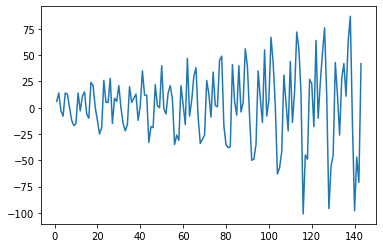

In [38]:
plt.plot(df.Passengers.diff())

# PACF plot
The next step is to identify if the model needs any AR terms. You can find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.

Partial autocorrelation can be imagined as the correlation between the series and its lag, after excluding the contributions from the intermediate lags. So, PACF sort of conveys the pure correlation between a lag and the series. That way, you will know if that lag is needed in the AR term or not.

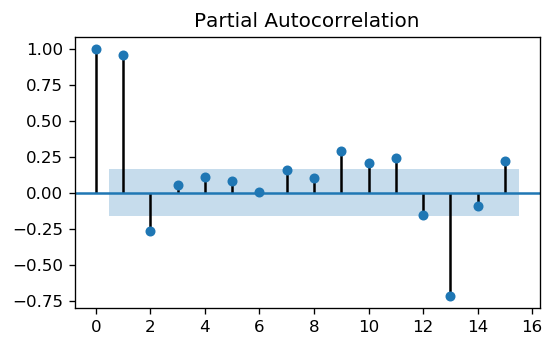

In [40]:

plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':120})


from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df.Passengers,lags=15);

A pure Auto Regressive (AR) model is one where Yt depends only on its own lags. That is, Yt is a function of the ‘lags of Yt’.

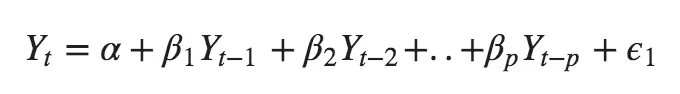

In [41]:
X=df.First_Difference.values
Y=df.Passengers.values

In [42]:
from sklearn.model_selection import train_test_split
training_x,test_x,training_y,test_y=train_test_split(X,Y,test_size=0.3,random_state=0)

In [43]:
training_x=training_x.reshape(-1,1)
test_x=test_x.reshape(-1,1)

In [44]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg.fit(training_x,training_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
pred_y=linear_reg.predict(test_x)

In [46]:
linear_reg.coef_

array([0.89474477])

In [47]:
linear_reg.intercept_

277.32154796851404

In [48]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(test_y,pred_y)))

129.94046352976335


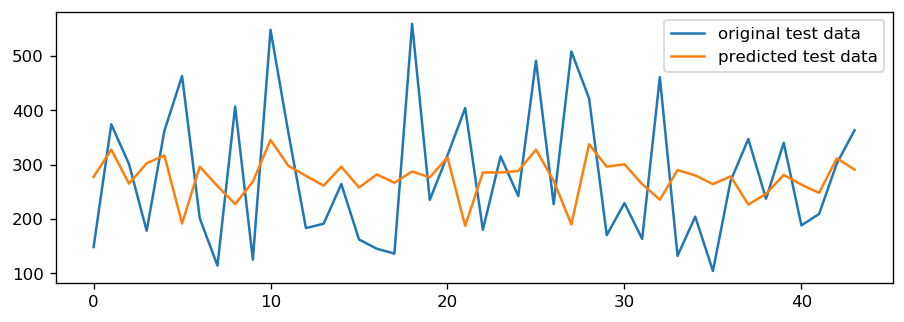

In [50]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

plt.plot(test_y,label="original test data")
plt.plot(pred_y,label="predicted test data")
plt.legend()
plt.show()

# AR model using Library 

p — the number of autoregressive

d — degree of differencing

q — the number of moving average terms

In [51]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['Passengers'],order=(1,0,0))
model_fit=model.fit()


In [52]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  144
Model:                     ARMA(1, 0)   Log Likelihood                -711.090
Method:                       css-mle   S.D. of innovations             33.446
Date:                Tue, 23 Jun 2020   AIC                           1428.179
Time:                        13:51:14   BIC                           1437.089
Sample:                             0   HQIC                          1431.800
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              278.0447     67.025      4.148      0.000     146.678     409.412
ar.L1.Passengers     0.9646      0.021     45.139      0.000       0.923       1.006
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0367           +0.0000j            1.0367            0.0000
-----------------------------------------------------------------------------
"""

In [53]:
forecasted=model_fit.forecast(steps=300)
forecasted

(array([426.54597117, 421.28515709, 416.21071291, 411.31603629,
        406.59475877, 402.04073751, 397.64804727, 393.41097273,
        389.32400104, 385.38181466, 381.57928439, 377.91146279,
        374.37357765, 370.96102584, 367.66936729, 364.49431923,
        361.4317506 , 358.47767671, 355.62825402, 352.87977514,
        350.22866404, 347.67147135, 345.20486992, 342.82565046,
        340.53071737, 338.31708471, 336.18187233, 334.12230211,
        332.13569434, 330.21946426, 328.37111866, 326.58825265,
        324.86854657, 323.20976289, 321.60974338, 320.06640625,
        318.57774348, 317.14181816, 315.75676201, 314.42077295,
        313.13211271, 311.88910463, 310.69013142, 309.53363311,
        308.41810497, 307.3420956 , 306.304205  , 305.30308278,
        304.33742637, 303.40597936, 302.50752984, 301.64090885,
        300.80498883, 299.99868216, 299.22093975, 298.4707497 ,
        297.74713592, 297.04915692, 296.37590457, 295.7265029 ,
        295.10010697, 294.49590178, 293.

# forecasting (Graphical Visualization)

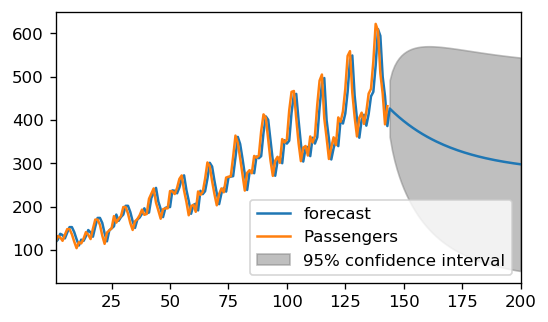

In [56]:
plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':120})
model_fit.plot_predict(1,200);